# Contours

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('Image.png')

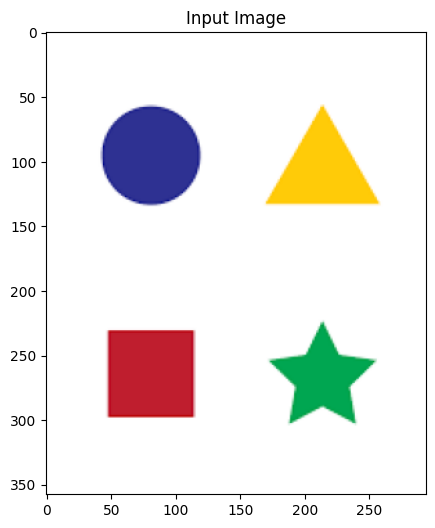

In [3]:
plt.figure(figsize=(6, 6))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')

plt.show()

In [4]:
# Convert image to grayscale
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Extract edges
edged_img = cv2.Canny(gray_img, 30, 200)

# Find contours
contours, hierarchy = cv2.findContours(edged_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [5]:
print(len(contours))

4


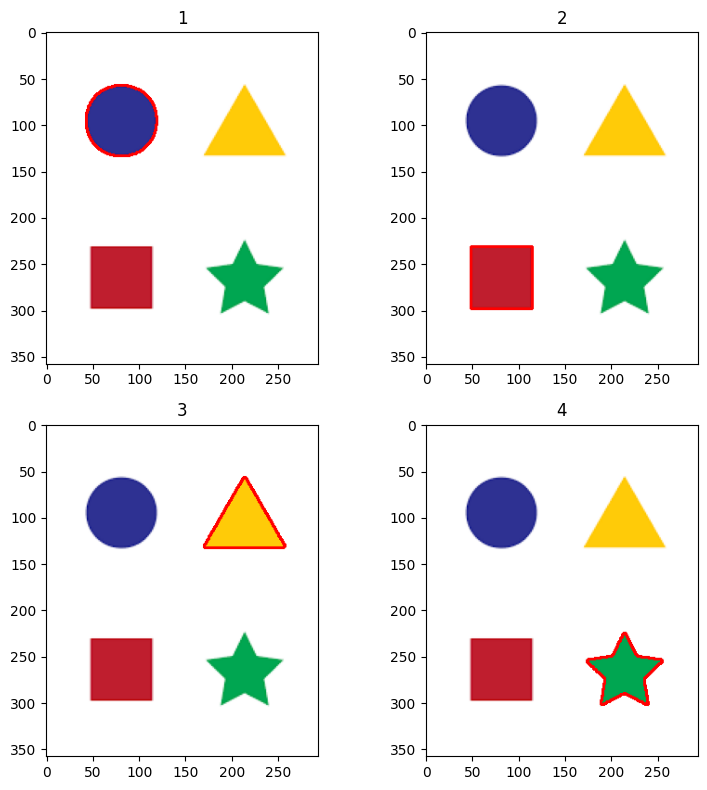

In [6]:
plt.figure(figsize=(8, 8))

sorted_contours = sorted(contours, key= cv2.contourArea, reverse= True)
for i in range(len(contours)):
    # read image again to delete previous countour 
    image = cv2.imread('Image.png')
    
    plt.subplot(2, 2, i+1)
    cv2.drawContours(image, sorted_contours, i, (0,0,255), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(str(i+1))

plt.tight_layout()
plt.show()

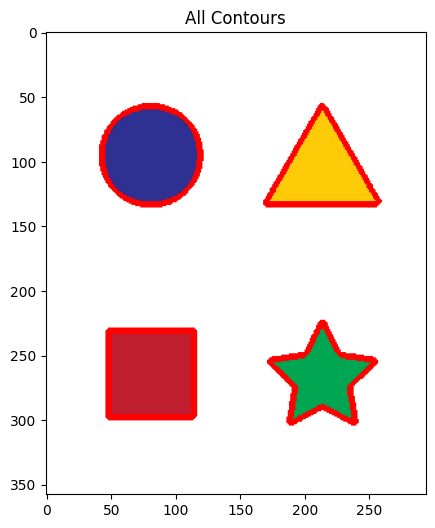

In [7]:
plt.figure(figsize=(6, 6))

image = cv2.imread('Image.png')

# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,0,255), 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('All Contours')

plt.show()

**cv2.findContours(image, Retrieval Mode, Approximation Method)**

Returns -> contours, hierarchy

**NOTE** In OpenCV 3.X, findContours returns a 3rd argument which is ret (or a boolean indicating if the function was successfully run). 

If you're using OpenCV 3.X replace line 12 with:

_, contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

The variable 'contours' are stored as a numpy array of (x,y) points that form the contour

While, 'hierarchy' describes the child-parent relationships between contours (i.e. contours within contours)



#### Approximation Methods

Using cv2.CHAIN_APPROX_NONE stores all the boundary points. But we don't necessarily need all bounding points. If the points form a straight line, we only need the start and ending points of that line.

Using cv2.CHAIN_APPROX_SIMPLE instead only provides these start and end points of bounding contours, thus resulting in much more efficent storage of contour information..